## Name: B Venkatesh Reddy
## Registration: AP23122040004
## Branch: MTech-AIML
## Email ID: venkatesh_reddy@srmap.edu.in

In [67]:
import numpy as np
import pandas as pd

In [68]:
import pandas as pd
# Load the Excel file
df = pd.read_excel('employee_burnout_analysis-AI.xlsx')

In [69]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [70]:
df.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [71]:
# statistical information of the data
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [72]:
df.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [74]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [75]:
df.isnull().sum().values.sum()

4622

In [76]:
# Impute missing values
df['Resource Allocation'].fillna(df['Resource Allocation'].median(), inplace=True)
df['Mental Fatigue Score'].fillna(df['Mental Fatigue Score'].median(), inplace=True)
df['Burn Rate'].fillna(df['Burn Rate'].median(), inplace=True)

# Verify that there are no missing values left
print(df.isnull().sum())

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64


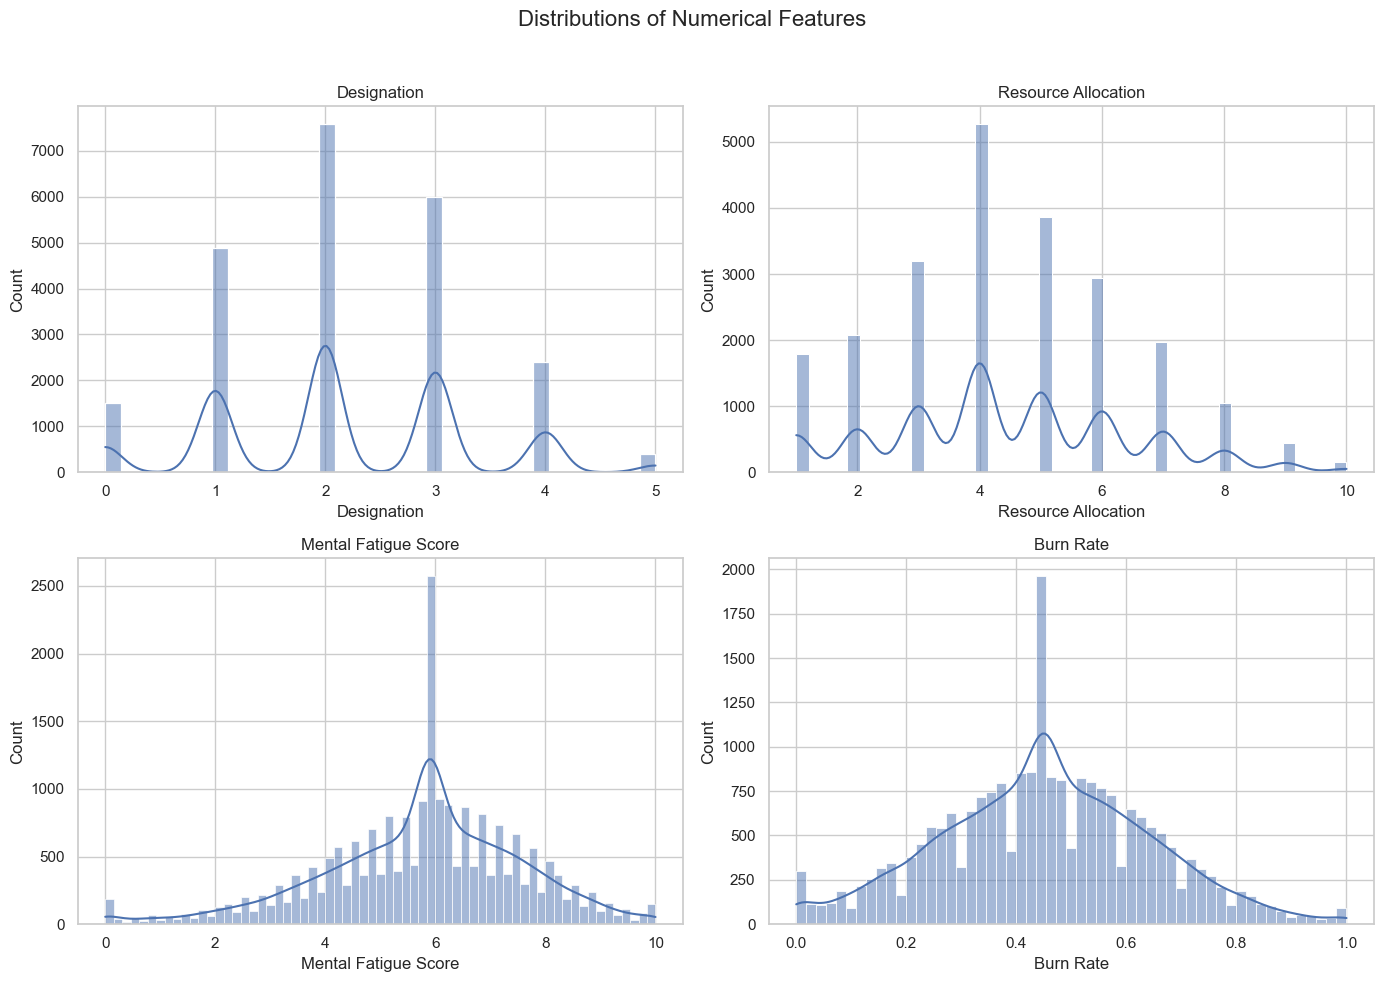

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create histograms for numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distributions of Numerical Features', fontsize=16)

# Designation
sns.histplot(df['Designation'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Designation')

# Resource Allocation
sns.histplot(df['Resource Allocation'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Resource Allocation')

# Mental Fatigue Score
sns.histplot(df['Mental Fatigue Score'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Mental Fatigue Score')

# Burn Rate
sns.histplot(df['Burn Rate'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Burn Rate')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


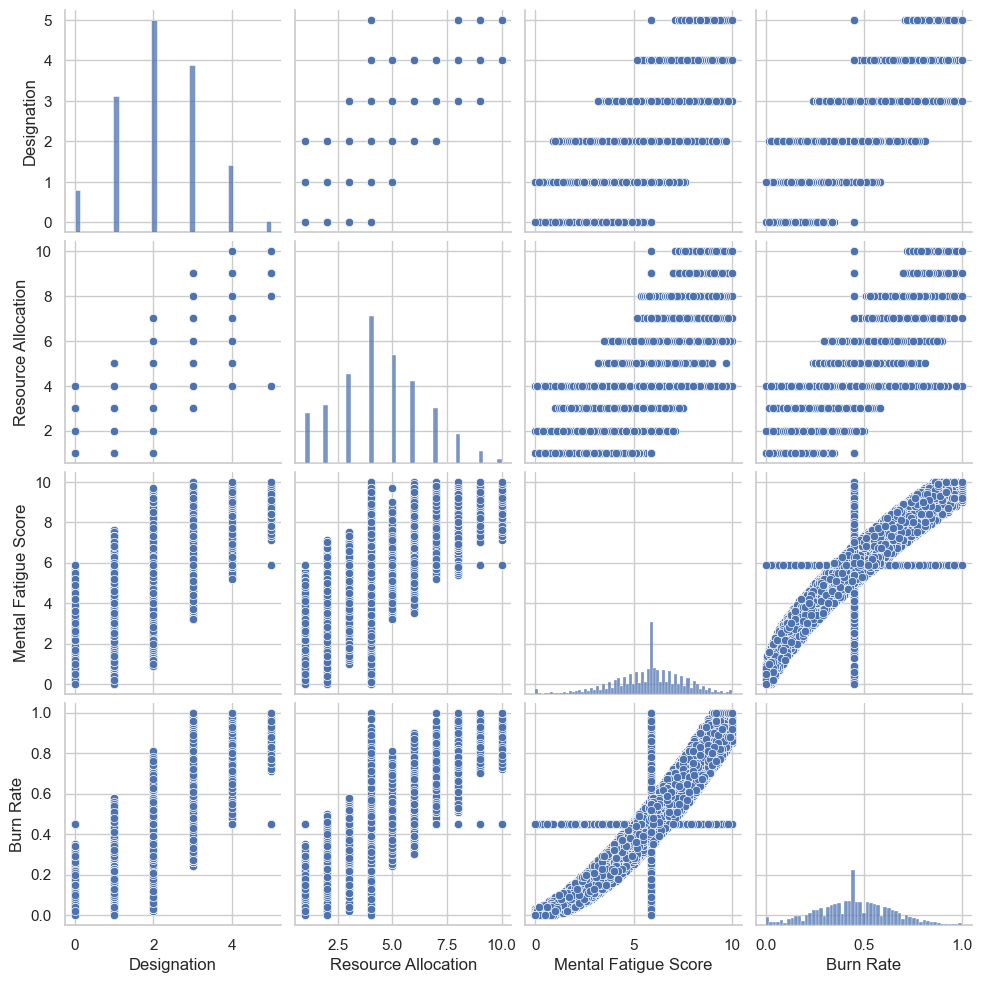

In [78]:
# Univariate Analysis
sns.pairplot(df)
plt.show()

C:\Users\venky\AppData\Local\Temp\ipykernel_15284\1988171347.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


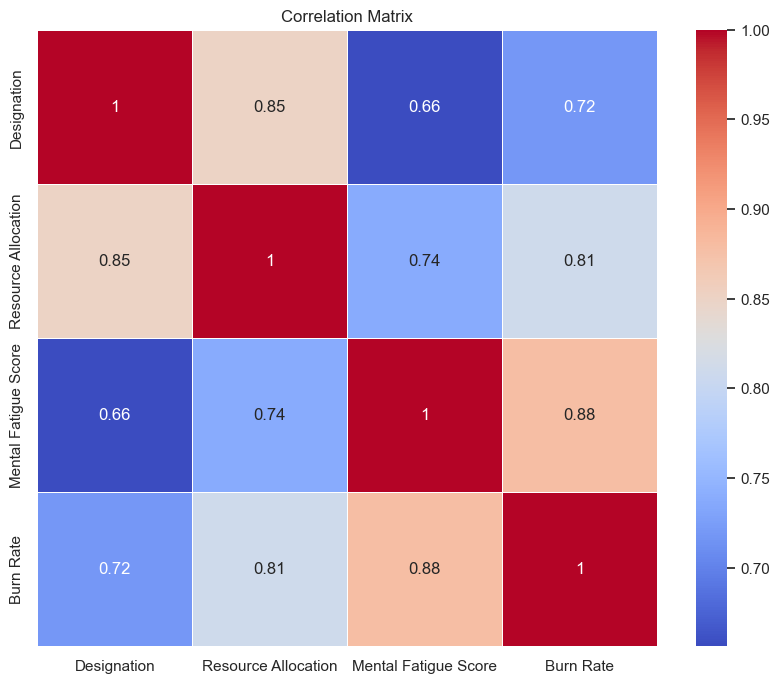

In [79]:
# Calculate and visualize the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [80]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first=True)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Designation', 'Resource Allocation', 'Mental Fatigue Score']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Display the first few rows of the encoded and normalized dataset
print(df_encoded.head())


                Employee ID Date of Joining  Designation  Resource Allocation  \
0  fffe32003000360033003200      2008-09-30    -0.157451            -0.730698   
1      fffe3700360033003500      2008-11-30    -1.038415            -1.233872   
2  fffe31003300320037003900      2008-03-10    -0.157451            -0.227523   
3  fffe32003400380032003900      2008-11-03    -1.038415            -1.737046   
4  fffe31003900340031003600      2008-07-24     0.723514             1.282000   

   Mental Fatigue Score  Burn Rate  Gender_Male  Company Type_Service  \
0             -1.062437       0.16            0                     1   
1             -0.406671       0.36            1                     1   
2              0.030506       0.49            0                     0   
3             -1.718203       0.20            1                     1   
4              0.631625       0.52            0                     1   

   WFH Setup Available_Yes  
0                        0  
1               

In [81]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df_encoded.drop(columns=['Employee ID', 'Date of Joining', 'Burn Rate'])
y = df_encoded['Burn Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(18200, 6) (4550, 6)


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

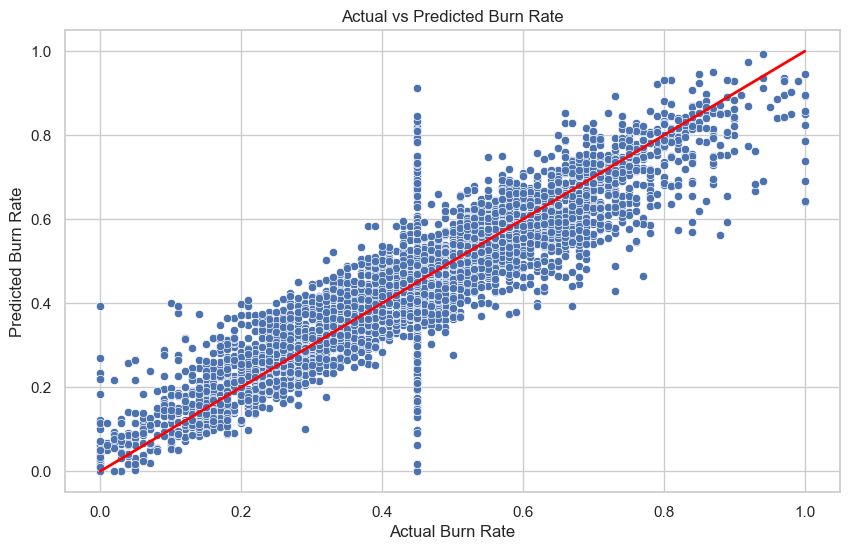

In [83]:
sns.set(style="whitegrid")

# Create a DataFrame to hold actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot to show actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2) # 45-degree line
plt.title('Actual vs Predicted Burn Rate')
plt.xlabel('Actual Burn Rate')
plt.ylabel('Predicted Burn Rate')
plt.show()

In [94]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
amr = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {amr}')
print(f'Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.005986825059783101
Mean Absolute Error: 0.05658904910589544
Mean Squared Error: 0.07737457631407813
R-squared: 0.8336747540440181


Accuracy: 0.8674725274725275
Precision: 0.9260611592879964
Recall: 0.8214574898785425
F1-score: 0.8706286204677108


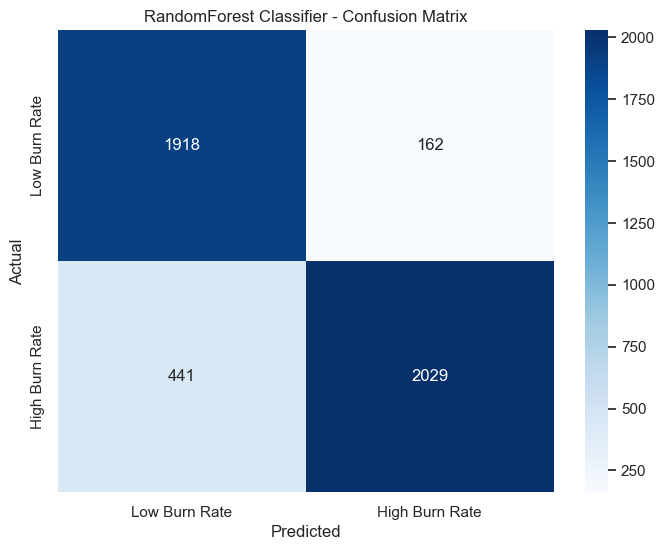

In [96]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a threshold for categorizing burn rate (e.g., median value)
threshold = df['Burn Rate'].median()

# Convert actual and predicted burn rates to binary categories based on the threshold
y_test_binary = np.where(y_test >= threshold, 1, 0)
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy}')

# Calculate precision
precision = precision_score(y_test_binary, y_pred_binary)
print(f'Precision: {precision}')

# Calculate recall
recall = recall_score(y_test_binary, y_pred_binary)
print(f'Recall: {recall}')

# Calculate F1-score
f1 = f1_score(y_test_binary, y_pred_binary)
print(f'F1-score: {f1}')

# Plot confusion matrix
conf_matrix_linear = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Burn Rate', 'High Burn Rate'], yticklabels=['Low Burn Rate', 'High Burn Rate'])
plt.title('RandomForest Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Mean Squared Error (MSE): 0.0061051901059646085
Mean Absolute Error (MAE): 0.056876407572671456
Root Mean Squared Error (RMSE): 0.07813571594325228
R-squared (R²): 0.8303863507213656
Accuracy: 0.8720879120879121
Precision: 0.906896551724138
Recall: 0.8518218623481781
F1-score: 0.8784968684759916


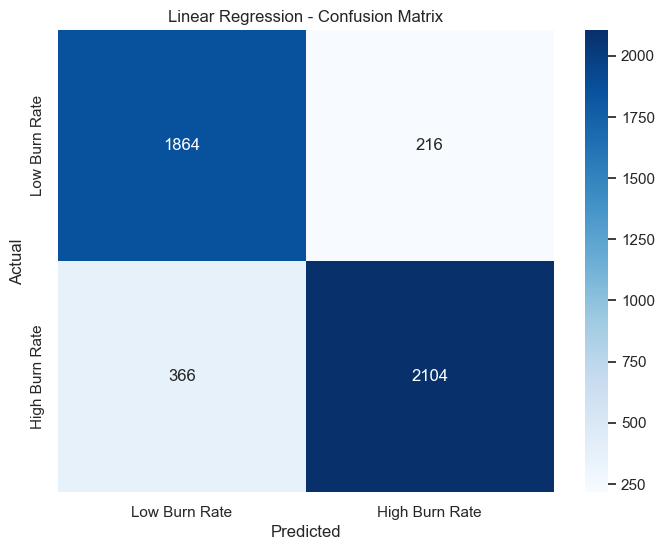

In [93]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Define a threshold for categorizing burn rate (e.g., median value)
threshold = df['Burn Rate'].median()

# Convert actual burn rates to binary categories based on the threshold
y_train_binary = np.where(y_train >= threshold, 1, 0)
y_test_binary = np.where(y_test >= threshold, 1, 0)

# Convert predicted burn rates to binary categories based on the threshold
y_pred_binary_linear = np.where(y_pred_linear >= threshold, 1, 0)

# Evaluate the model (Regression Metrics)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Mean Squared Error (MSE): {mse_linear}')
print(f'Mean Absolute Error (MAE): {mae_linear}')
print(f'Root Mean Squared Error (RMSE): {rmse_linear}')
print(f'R-squared (R²): {r2_linear}')

# Evaluate the model (Classification Metrics)
accuracy_linear = accuracy_score(y_test_binary, y_pred_binary_linear)
precision_linear = precision_score(y_test_binary, y_pred_binary_linear)
recall_linear = recall_score(y_test_binary, y_pred_binary_linear)
f1_linear = f1_score(y_test_binary, y_pred_binary_linear)

print(f'Accuracy: {accuracy_linear}')
print(f'Precision: {precision_linear}')
print(f'Recall: {recall_linear}')
print(f'F1-score: {f1_linear}')

# Plot confusion matrix
conf_matrix_linear = confusion_matrix(y_test_binary, y_pred_binary_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Burn Rate', 'High Burn Rate'], yticklabels=['Low Burn Rate', 'High Burn Rate'])
plt.title('Linear Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Mean Squared Error (MSE): 0.09144344191116091
Mean Absolute Error (MAE): 0.1888295437863469
Root Mean Squared Error (RMSE): 0.30239616715686213
R-squared (R²): 0.6315190251935128
Accuracy: 0.8707692307692307
Precision: 0.8872427983539095
Recall: 0.8728744939271255
F1-score: 0.8799999999999999


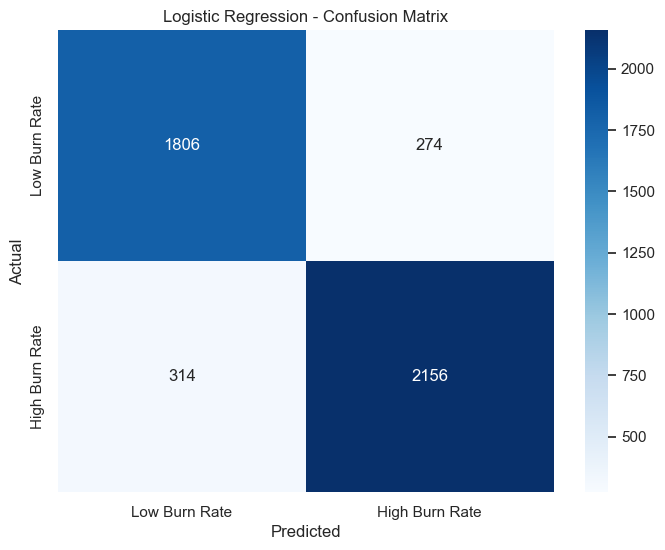

In [92]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already loaded and the data is split into X_train, X_test, y_train, y_test
# Define a threshold for categorizing burn rate (e.g., median value)
threshold = df['Burn Rate'].median()

# Convert actual burn rates to binary categories based on the threshold
y_train_binary = np.where(y_train >= threshold, 1, 0)
y_test_binary = np.where(y_test >= threshold, 1, 0)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train_binary)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model (Regression Metrics)
mse_logistic = mean_squared_error(y_test_binary, y_prob_logistic)
mae_logistic = mean_absolute_error(y_test_binary, y_prob_logistic)
rmse_logistic = np.sqrt(mse_logistic)
r2_logistic = r2_score(y_test_binary, y_prob_logistic)

print(f'Mean Squared Error (MSE): {mse_logistic}')
print(f'Mean Absolute Error (MAE): {mae_logistic}')
print(f'Root Mean Squared Error (RMSE): {rmse_logistic}')
print(f'R-squared (R²): {r2_logistic}')

# Evaluate the model (Classification Metrics)
accuracy_logistic = accuracy_score(y_test_binary, y_pred_logistic)
precision_logistic = precision_score(y_test_binary, y_pred_logistic)
recall_logistic = recall_score(y_test_binary, y_pred_logistic)
f1_logistic = f1_score(y_test_binary, y_pred_logistic)

print(f'Accuracy: {accuracy_logistic}')
print(f'Precision: {precision_logistic}')
print(f'Recall: {recall_logistic}')
print(f'F1-score: {f1_logistic}')

# Plot confusion matrix
conf_matrix_logistic = confusion_matrix(y_test_binary, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Burn Rate', 'High Burn Rate'], yticklabels=['Low Burn Rate', 'High Burn Rate'])
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize Actual vs Predicted (Binary)
sns.set(style="whitegrid")

# Create a DataFrame to hold actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test_binary, 'Predicted': y_prob_logistic})


In [95]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.8584162020742628


In [9]:
# Feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                   Feature  Importance
2     Mental Fatigue Score    0.849818
1      Resource Allocation    0.101364
0              Designation    0.018381
5  WFH Setup Available_Yes    0.010349
4     Company Type_Service    0.010253
3              Gender_Male    0.009834


In [10]:
import joblib

# Save the trained model
joblib.dump(model, 'employee_burnout_model.pkl')

# Load the model (for future use)
# model = joblib.load('employee_burnout_model.pkl')


['employee_burnout_model.pkl']